In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for the visualization
!pip install aquarel catppuccin-matplotlib mplcyberpunk matplotx vapeplot
from aquarel import load_theme
import mplcatppuccin
import mplcyberpunk
import matplotx
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

  Preparing metadata (setup.py) ... - done
  Created wheel for vapeplot: filename=vapeplot-0.0.8-py3-none-any.whl size=11012 sha256=32f1be5572e7b73d62a7157699221e8b43f53271ec0ae4a9d969081f0bd76af1
  Stored in directory: /root/.cache/pip/wheels/aa/ee/f8/9c3f6e025c82c4621a7e962d57d3a51f8d557a9b3b6b3f84ba
Successfully built vapeplot
/kaggle/input/us-stores-sales/sales.csv


## Table of Content:
* [Data Cleaning](#first-bullet)
* [Data Visualization](#second-bullet)
   * [Light style 1](#sub-bullet1)
   * [Light style 2](#sub-bullet2)
   * [Dark style 1](#sub-bullet3)
   * [Dark style 2](#sub-bullet4)


The dataset contains informations on American stores between 2010 and 2011. <br>
Lets get familiar with our data. <br>

Area Code: Store's Code <br>
State: Store's State <br>
Market: Store's Region <br>
Market Size: Store's Size <br>
Profit: Profits in Dollars <br>
Margin: (Profit + Total Expenses) OR (Sales - COGS). Margin is the difference between the price at which a product is sold and the costs associated with making or selling the product (or cost of goods sold). <br>
Sales: Values Acquired in Sales <br>
COGS: Cost of Goods Sold. It includes all of the costs and expenses directly related to the production of goods <br>
Total Expenses: Total Expenses to get the Product to Sell. It includes various expenses such as overheads, wages, supplies, and other operational costs. <br>
Marketing: Expenses in Marketing <br>
Inventory: Inventory Value of the Product in the Sale Moment <br>
Budget Profit: Expected Profit <br>
Budget COGS: Expected COGS  <br>
Budget Margin: Expected Profit + Expected Total Expenses OR Expected Sales - Expected COGS <br>
Budget Sales: Expected Value Acquired in Sales <br>
ProductID: Product ID <br>
Date: Sale Date <br>
Product Type: Product Category <br>
Product: Product Description <br>
Type: Type <br>

In [2]:
df_stores = pd.read_csv('/kaggle/input/us-stores-sales/sales.csv')

df_stores.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


# DATA CLEANING <a class="anchor" id="first-bullet"></a>

In [3]:
# Change Date column's type
import datetime
df_stores['Date'] = df_stores['Date'].apply(lambda date: date[0:8])
df_stores['Date'] = pd.to_datetime(df_stores['Date'],format= '%d/%m/%y')

In [4]:
df_stores['Date']

0      2010-01-04
1      2010-01-07
2      2010-01-11
3      2010-01-12
4      2011-01-07
          ...    
4243   2010-01-07
4244   2010-01-08
4245   2010-01-12
4246   2011-01-04
4247   2011-01-05
Name: Date, Length: 4248, dtype: datetime64[ns]

We can see that there are no null values in our dataframe, as every column has 4248 non-null values. Is there negative values that it shouldn't be? Let's check it.

In [5]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

In [6]:
# checking for negative values
numerical_columns = [c for c in df_stores.columns if df_stores[c].dtype.name == 'float64']

# to deal with int to str conversion problem
df_stores[df_stores[numerical_columns] < 0].count() 

Area Code           0
State               0
Market              0
Market Size         0
Profit            528
Margin            112
Sales               0
COGS                0
Total Expenses      0
Marketing           0
Inventory          88
Budget Profit     188
Budget COGS         0
Budget Margin     112
Budget Sales        0
ProductId           0
Date                0
Product Type        0
Product             0
Type                0
dtype: int64

Except from Inventory column the other is ok to have negative values.
Let's change the Inventory column. If the value is negative we will change it with zero.

In [7]:
df_stores['Month'] = pd.DatetimeIndex(df_stores['Date']).day
df_stores['Υear'] = pd.DatetimeIndex(df_stores['Date']).year
df_stores.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,Month,Υear
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,...,110.0,160.0,270.0,2,2010-01-04,Coffee,Columbian,Regular,4,2010
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,...,80.0,130.0,210.0,2,2010-01-07,Coffee,Columbian,Regular,7,2010
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,...,110.0,180.0,290.0,2,2010-01-11,Coffee,Columbian,Regular,11,2010
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,...,100.0,160.0,260.0,2,2010-01-12,Coffee,Columbian,Regular,12,2010
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,...,80.0,130.0,210.0,2,2011-01-07,Coffee,Columbian,Regular,7,2011


In [8]:
# replacing negative values with zero
df_stores['Inventory'] = df_stores['Inventory'].apply(lambda value: value if value>=0 else 0)

Now that our dataset is clean we can make some visualizations. <br>
Below I used 4 different styles to use in our chart. There are 4 Product Types (Coffee, Espresso, Tea and Herbal Tea) we can make coffee - espresso and tea - herbal tea in the same category but let's keep it this way.

In [9]:
df_stores['Product Type'].unique()

array(['Coffee', 'Tea', 'Espresso', 'Herbal Tea'], dtype=object)

In [10]:
# saving dataframe to csv file
df_stores.to_csv('stores.csv')

# DATA VIZUALIZATION <a class="anchor" id="second-bullet"></a>


We are going to see 2 light styles and two dark styles. <br>
We will make 4 chart: <br>
* A scatter plot that we will observe the relationship of sales and the market cost of each product.
* A line plot where we will compare budget sales line with actual sales of the product for each month.
* A histogram to see the distribution of 4 different values (Profit, Budget Profit, COGS and Budget COGS)
* A KDE plot to observe the distribution of the 4 above values.

## LIGHT STYLE 1 (AQUAREL LIBRARY) <a class="anchor" id="sub-bullet1"></a>

In [11]:
df_coffee = df_stores.loc[(df_stores['Product Type'] == 'Coffee') & (df_stores["Market Size"] == 'Small Market') & (df_stores['Υear'] == 2010)]

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

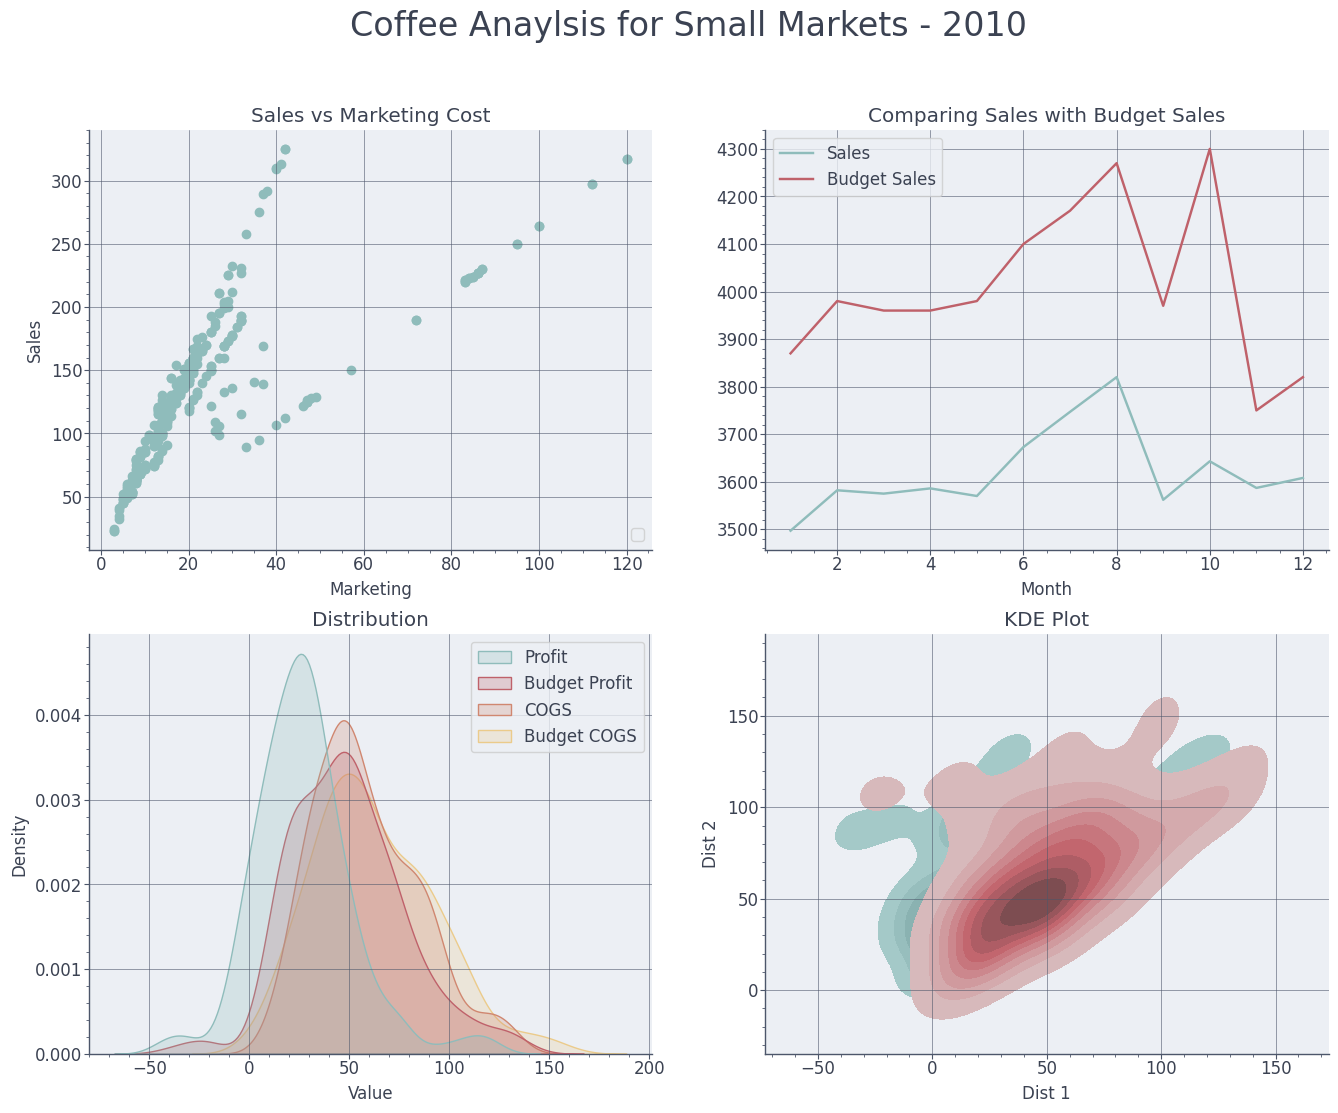

In [12]:
with load_theme("arctic_light"):
    # Scatter plot
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,12))
    f= ax[0,0].scatter(df_coffee['Marketing'],df_coffee['Sales'])
    ax[0,0].set_xlabel('Marketing')
    ax[0,0].set_ylabel('Sales')
    handles, labels = f.legend_elements(prop="colors", alpha=0.6)
    legend2 = ax[0,0].legend(handles, labels, loc="lower right")


    #Line plot
    df_month_sort = df_coffee.groupby("Month")['Sales'].sum()
    df_month_sort2 = df_coffee.groupby("Month")['Budget Sales'].sum()
    
    def line():
        df = df_month_sort.to_frame().reset_index() 
        return df
    
    df=line()
    df.plot(x='Month', ax=ax[0,1])
    
    def line2():
        df = df_month_sort2.to_frame().reset_index() 
        return df
    
    df=line2()
    df.plot(x='Month', ax=ax[0,1])

    
    # Histogram
    def hist():
        x_1 = df_coffee['Profit']
        x_2 = df_coffee['Budget Profit']
        x_3 = df_coffee['COGS']
        x_4 = df_coffee['Budget COGS']
        df = pd.DataFrame({'Profit': x_1, 'Budget Profit' : x_2, 'COGS' : x_3, 'Budget COGS' : x_4})
        return df

    df=hist()
    sns.kdeplot(df, fill=True, ax=ax[1,0])
    ax[1,0].set_xlabel('Value')

    # KDE plot
    sns.kdeplot(df, x="Profit", y="COGS", fill=True, ax=ax[1,1])
    sns.kdeplot(df, x="Budget Profit", y="Budget COGS",fill=True, ax=ax[1,1])
    ax[1,1].set_xlabel('Dist 1')
    ax[1,1].set_ylabel('Dist 2')
    
    ax[0,0].title.set_text('Sales vs Marketing Cost')
    ax[0,1].title.set_text('Comparing Sales with Budget Sales')
    ax[1,0].title.set_text('Distribution')
    ax[1,1].title.set_text('KDE Plot')
    plt.suptitle('Coffee Anaylsis for Small Markets - 2010', fontsize=24)
    plt.savefig('Coffee-Sales-Anaylsis.jpg')
    plt.show()

## LIGHT STYLE 2  <a class="anchor" id="sub-bullet2"></a>

In [13]:
df_coffee = df_stores.loc[(df_stores['Product Type'] == 'Espresso' ) & (df_stores["Market Size"] == 'Small Market') & (df_stores['Υear'] == 2010)]

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

<Figure size 640x480 with 0 Axes>

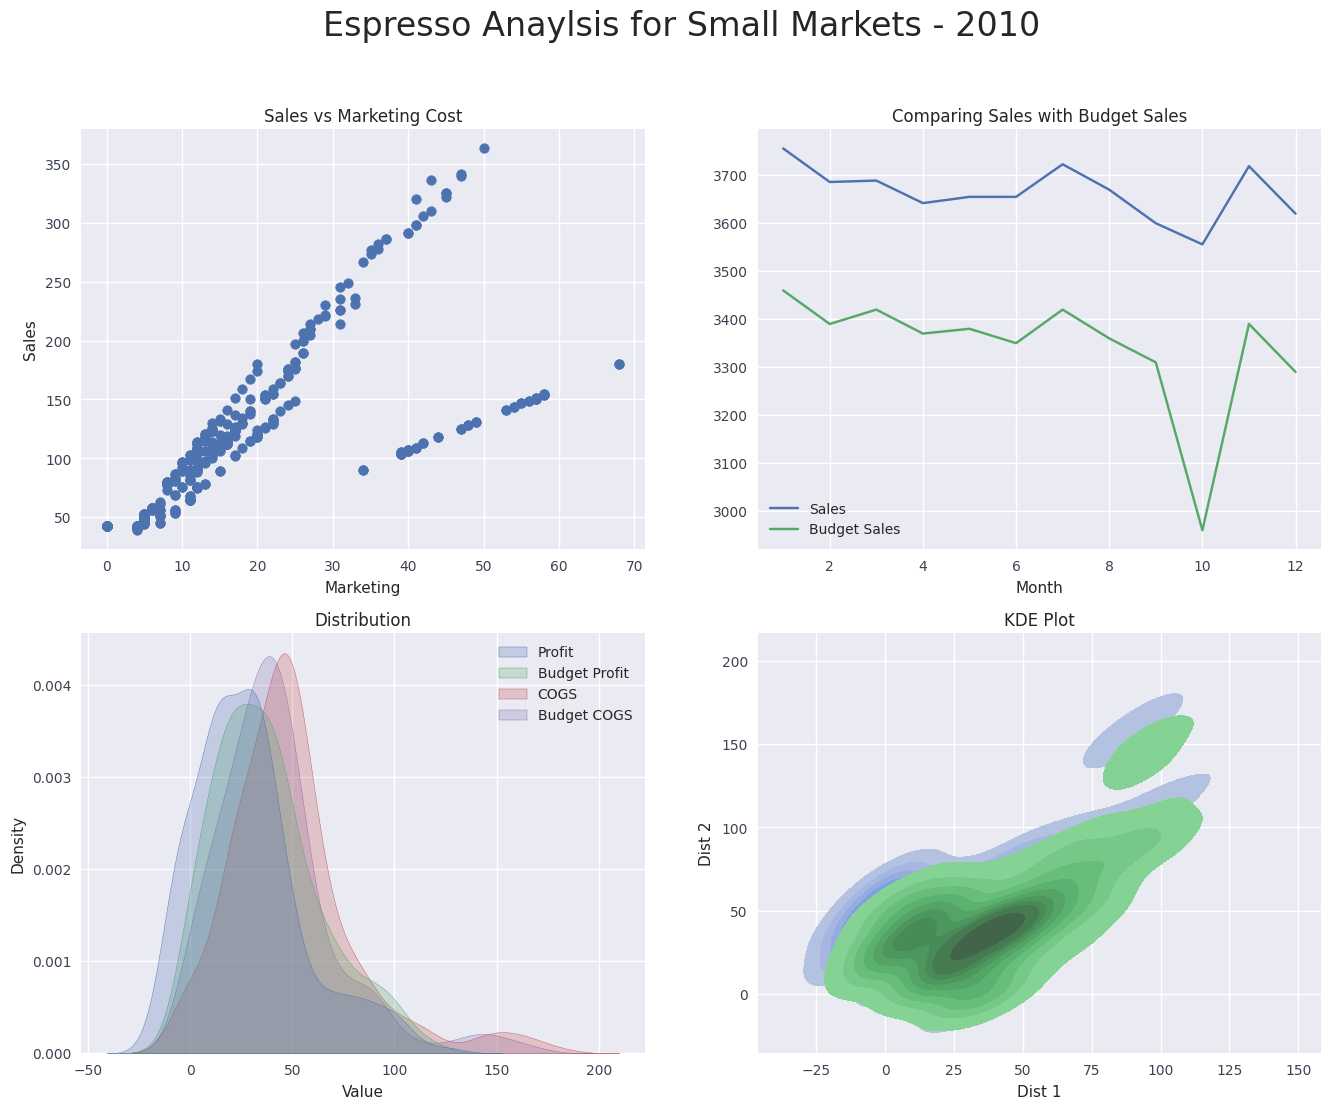

In [14]:
matplotlib.style.use(['seaborn-v0_8-dark', "seaborn-v0_8"])

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,12))
f= ax[0,0].scatter(df_coffee['Marketing'],df_coffee['Sales'])
ax[0,0].set_xlabel('Marketing')
ax[0,0].set_ylabel('Sales')
handles, labels = f.legend_elements(prop="colors", alpha=0.6)
legend2 = ax[0,0].legend(handles, labels, loc="lower right")


#Line plot
df_month_sort = df_coffee.groupby("Month")['Sales'].sum()
df_month_sort2 = df_coffee.groupby("Month")['Budget Sales'].sum()
    
def line():
    df = df_month_sort.to_frame().reset_index() 
    return df
    
df=line()
df.plot(x='Month', ax=ax[0,1])
    
def line2():
    df = df_month_sort2.to_frame().reset_index() 
    return df
    
df=line2()
df.plot(x='Month', ax=ax[0,1])

    
# Histogram
def hist():
    x_1 = df_coffee['Profit']
    x_2 = df_coffee['Budget Profit']
    x_3 = df_coffee['COGS']
    x_4 = df_coffee['Budget COGS']
    df = pd.DataFrame({'Profit': x_1, 'Budget Profit' : x_2, 'COGS' : x_3, 'Budget COGS' : x_4})
    return df

df=hist()
sns.kdeplot(df, fill=True, ax=ax[1,0])
ax[1,0].set_xlabel('Value')

# KDE plot
sns.kdeplot(df, x="Profit", y="COGS", fill=True, ax=ax[1,1])
sns.kdeplot(df, x="Budget Profit", y="Budget COGS",fill=True, ax=ax[1,1])
ax[1,1].set_xlabel('Dist 1')
ax[1,1].set_ylabel('Dist 2')
    
ax[0,0].title.set_text('Sales vs Marketing Cost')
ax[0,1].title.set_text('Comparing Sales with Budget Sales')
ax[1,0].title.set_text('Distribution')
ax[1,1].title.set_text('KDE Plot')
plt.suptitle('Espresso Anaylsis for Small Markets - 2010', fontsize=24)
plt.savefig('Espresso-Sales-Anaylsis.jpg')
plt.show()

## DARK STYLE 1 <a class="anchor" id="sub-bullet3"></a>

In [15]:
df_coffee = df_stores.loc[(df_stores['Product Type'] == 'Tea') & (df_stores["Market Size"] == 'Small Market') & (df_stores['Υear'] == 2010)]

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

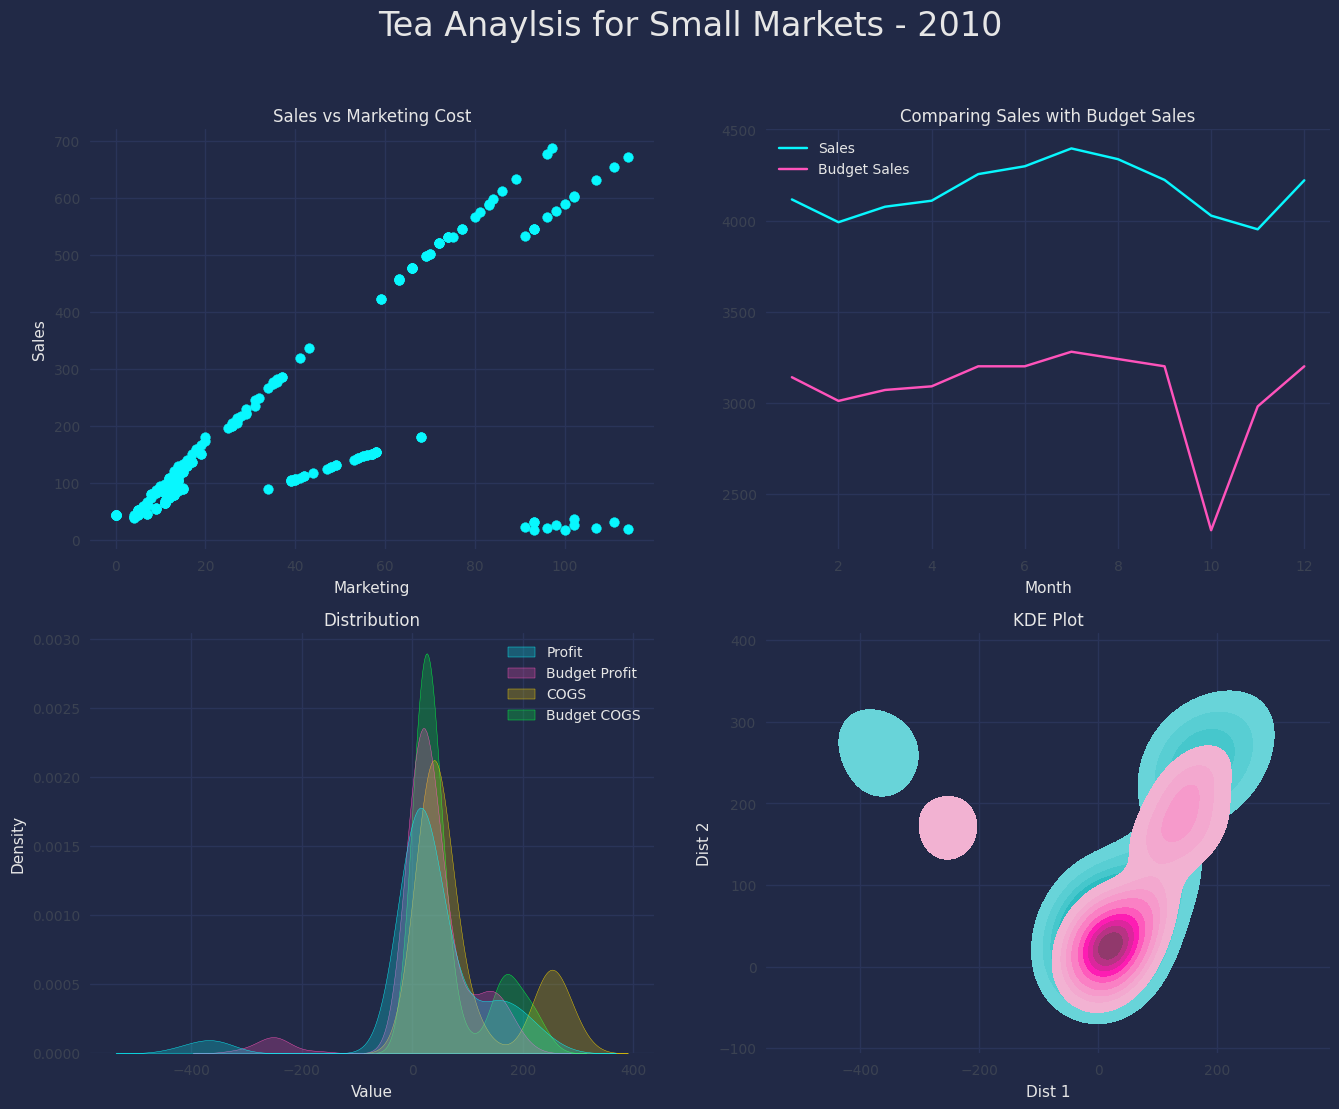

In [16]:
plt.style.use("cyberpunk")

# Scatter plot
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,12))
f= ax[0,0].scatter(df_coffee['Marketing'],df_coffee['Sales'])
ax[0,0].set_xlabel('Marketing')
ax[0,0].set_ylabel('Sales')
handles, labels = f.legend_elements(prop="colors", alpha=0.6)
legend2 = ax[0,0].legend(handles, labels, loc="lower right")


#Line plot
df_month_sort = df_coffee.groupby("Month")['Sales'].sum()
df_month_sort2 = df_coffee.groupby("Month")['Budget Sales'].sum()
    
def line():
    df = df_month_sort.to_frame().reset_index() 
    return df
    
df=line()
df.plot(x='Month', ax=ax[0,1])
    
def line2():
    df = df_month_sort2.to_frame().reset_index() 
    return df
    
df=line2()
df.plot(x='Month', ax=ax[0,1])

    
# Histogram
def hist():
    x_1 = df_coffee['Profit']
    x_2 = df_coffee['Budget Profit']
    x_3 = df_coffee['COGS']
    x_4 = df_coffee['Budget COGS']
    df = pd.DataFrame({'Profit': x_1, 'Budget Profit' : x_2, 'COGS' : x_3, 'Budget COGS' : x_4})
    return df

df=hist()
sns.kdeplot(df, fill=True, ax=ax[1,0])
ax[1,0].set_xlabel('Value')

# KDE plot
sns.kdeplot(df, x="Profit", y="COGS", fill=True, ax=ax[1,1])
sns.kdeplot(df, x="Budget Profit", y="Budget COGS",fill=True, ax=ax[1,1])
ax[1,1].set_xlabel('Dist 1')
ax[1,1].set_ylabel('Dist 2')
    
ax[0,0].title.set_text('Sales vs Marketing Cost')
ax[0,1].title.set_text('Comparing Sales with Budget Sales')
ax[1,0].title.set_text('Distribution')
ax[1,1].title.set_text('KDE Plot')
plt.suptitle('Tea Anaylsis for Small Markets - 2010', fontsize=24)
plt.savefig('Tea-Sales-Anaylsis.jpg')
plt.show()

## DARK STYLE 2 <a class="anchor" id="sub-bullet4"></a>

In [17]:
df_coffee = df_stores.loc[(df_stores['Product Type'] == 'Herbal Tea') & (df_stores["Market Size"] == 'Small Market') & (df_stores['Υear'] == 2010)]

/opt/conda/lib/python3.10/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

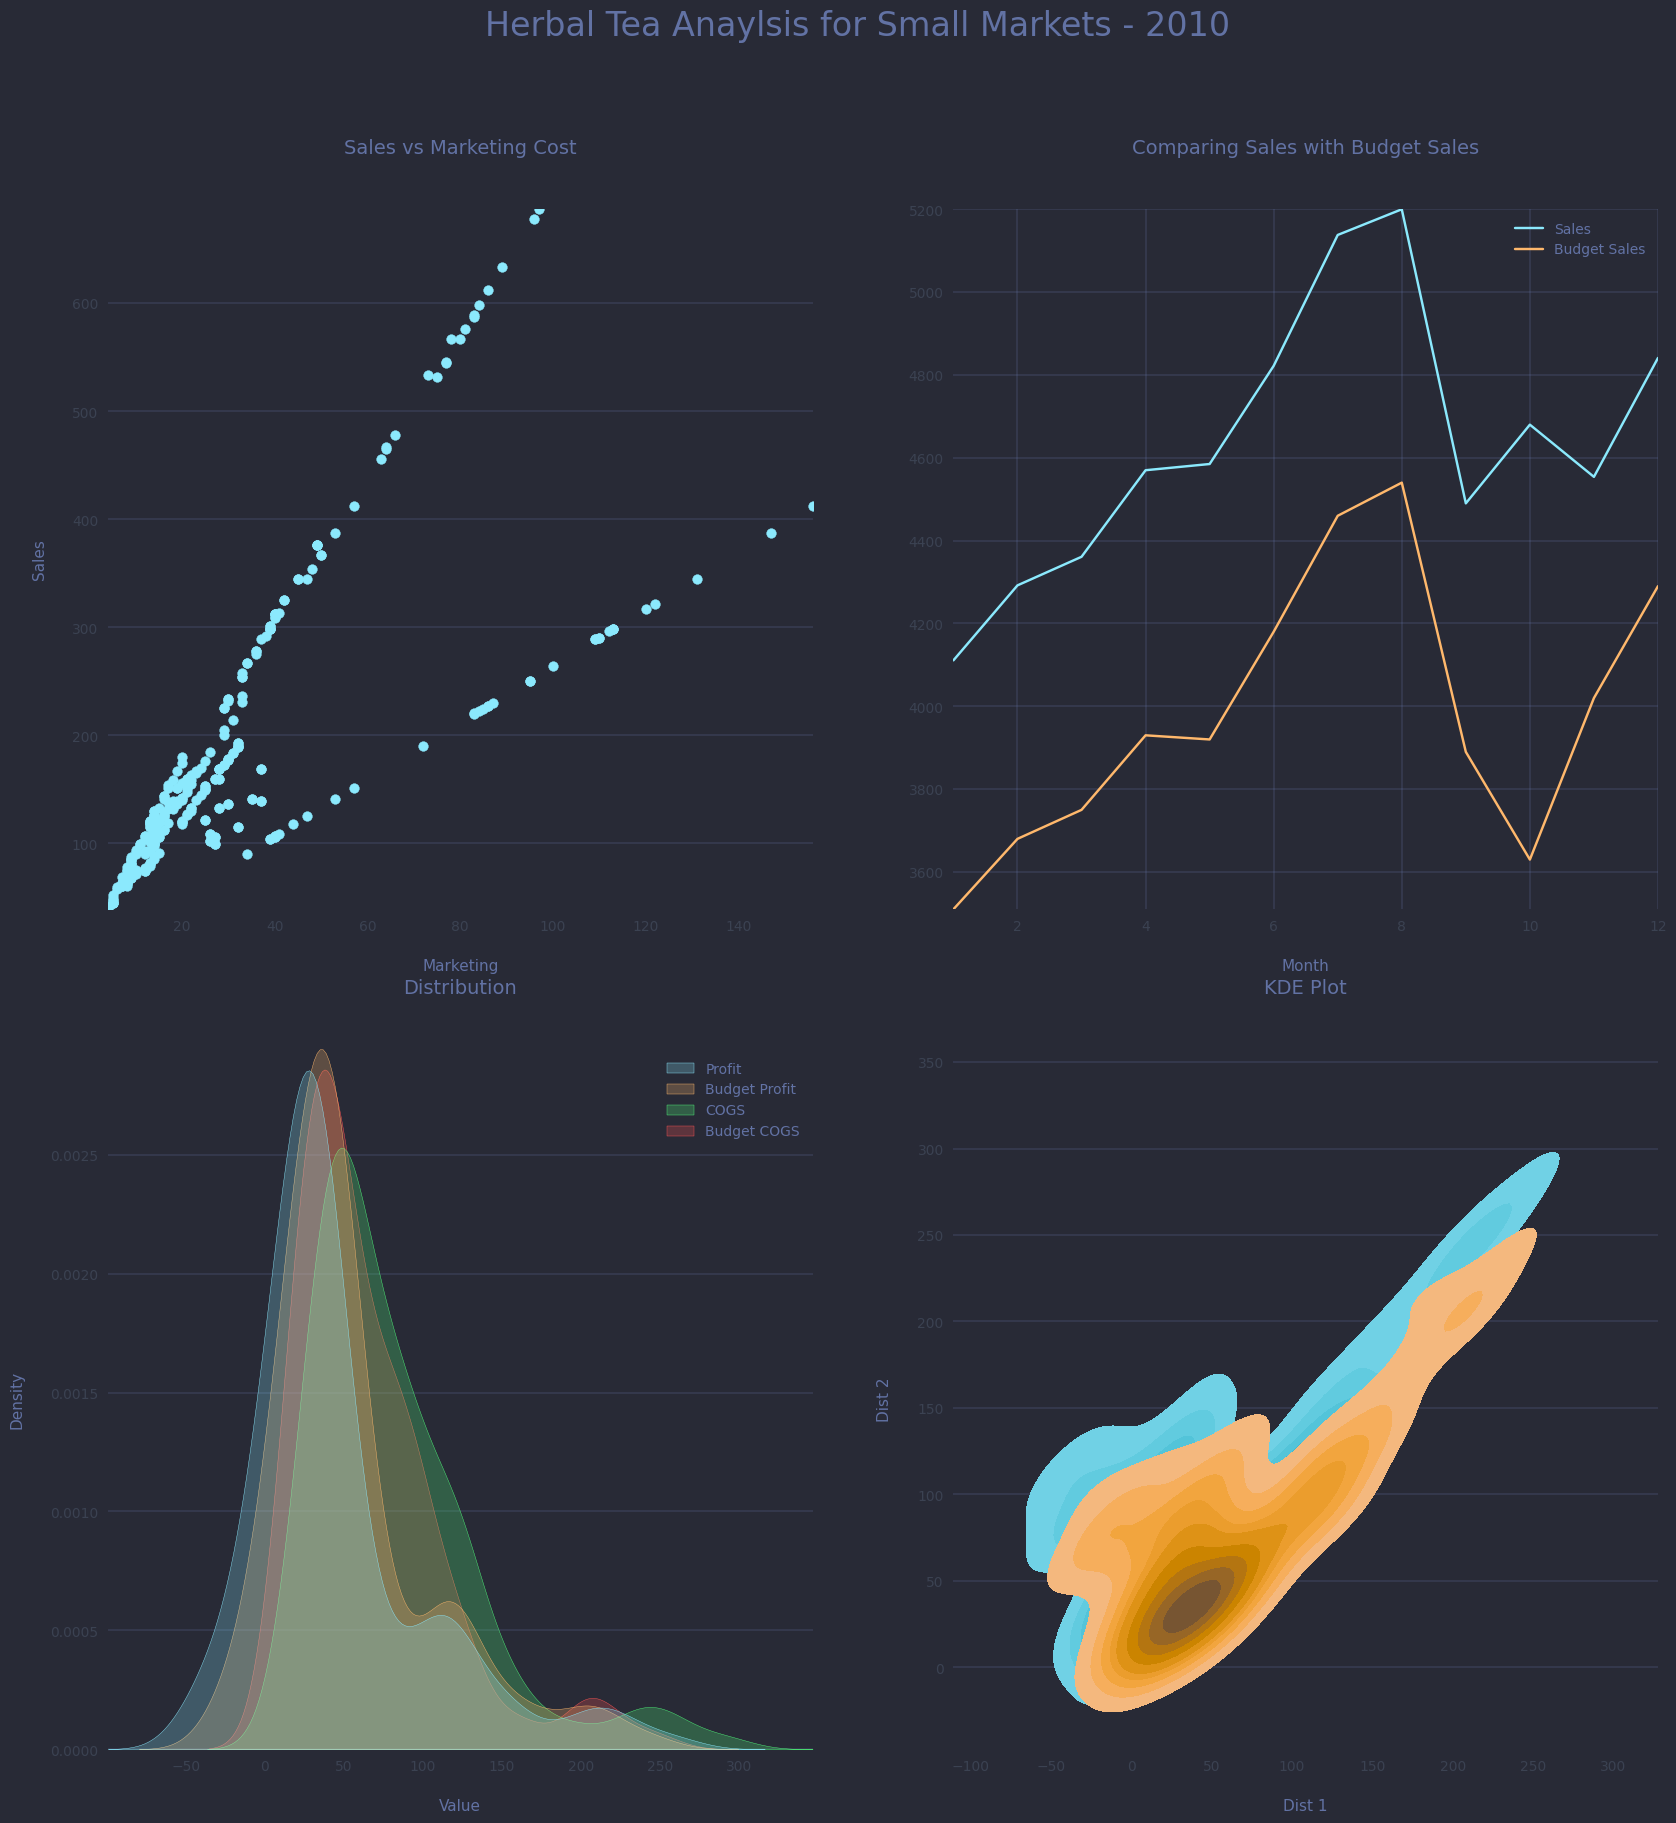

In [18]:
with plt.style.context(matplotx.styles.duftify(matplotx.styles.dracula)):
    # Scatter plot
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
    f= ax[0,0].scatter(df_coffee['Marketing'],df_coffee['Sales'])
    ax[0,0].set_xlabel('Marketing')
    ax[0,0].set_ylabel('Sales')
    handles, labels = f.legend_elements(prop="colors", alpha=0.6)
    legend2 = ax[0,0].legend(handles, labels, loc="lower right")


    #Line plot
    df_month_sort = df_coffee.groupby("Month")['Sales'].sum()
    df_month_sort2 = df_coffee.groupby("Month")['Budget Sales'].sum()
    
    def line():
        df = df_month_sort.to_frame().reset_index() 
        return df
    
    df=line()
    df.plot(x='Month', ax=ax[0,1])
    
    def line2():
        df = df_month_sort2.to_frame().reset_index() 
        return df
    
    df=line2()
    df.plot(x='Month', ax=ax[0,1])

    
    # Histogram
    def hist():
        x_1 = df_coffee['Profit']
        x_2 = df_coffee['Budget Profit']
        x_3 = df_coffee['COGS']
        x_4 = df_coffee['Budget COGS']
        df = pd.DataFrame({'Profit': x_1, 'Budget Profit' : x_2, 'COGS' : x_3, 'Budget COGS' : x_4})
        return df

    df=hist()
    sns.kdeplot(df, fill=True, ax=ax[1,0])
    ax[1,0].set_xlabel('Value')

    # KDE plot
    sns.kdeplot(df, x="Profit", y="COGS", fill=True, ax=ax[1,1])
    sns.kdeplot(df, x="Budget Profit", y="Budget COGS",fill=True, ax=ax[1,1])
    ax[1,1].set_xlabel('Dist 1')
    ax[1,1].set_ylabel('Dist 2')
    
    ax[0,0].title.set_text('Sales vs Marketing Cost')
    ax[0,1].title.set_text('Comparing Sales with Budget Sales')
    ax[1,0].title.set_text('Distribution')
    ax[1,1].title.set_text('KDE Plot')
    plt.suptitle('Herbal Tea Anaylsis for Small Markets - 2010', fontsize=24)
    plt.savefig('Herbal-Tea-Sales-Anaylsis.jpg')
    plt.show()

I also, created a tableau dashboard using the above datasets. Check out my dashboard below.

In [19]:
%%HTML
<div class='tableauPlaceholder' id='viz1711620904215' style='position: relative'><noscript><a href='#'><img alt='Coffee Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesDashboard_17092947330790&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='SalesDashboard_17092947330790&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Sa&#47;SalesDashboard_17092947330790&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1711620904215');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1280px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1280px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='3327px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>